# =============================
# BÀI TẬP 3: Luật kết hợp cho hệ khuyến nghị
# =============================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import os
import urllib.request
import zipfile

pd.set_option("display.max_columns", None)

In [2]:
ml_100k_url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
ml_100k_zip = 'ml-100k.zip'
ml_100k_folder = 'ml-100k'

if not os.path.exists(ml_100k_folder):
    if not os.path.exists(ml_100k_zip):
        print('Downloading MovieLens 100K dataset...')
        urllib.request.urlretrieve(ml_100k_url, ml_100k_zip)
    print('Extracting MovieLens 100K dataset...')
    with zipfile.ZipFile(ml_100k_zip, 'r') as zip_ref:
        zip_ref.extractall('.')

# Đọc dữ liệu đánh giá
ratings_cols = ['userID', 'itemID', 'rating', 'timestamp']
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

ratings_df.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# TODO: Chuyển đổi dữ liệu đánh giá thành dữ liệu giao dịch
# 1. Lọc các đánh giá cao (rating >= 4)
liked_movies = ratings_df[ratings_df['rating'] >= 4]
liked_movies.head(3)

,userID,itemID,rating,timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125


In [4]:
# 2. Nhóm theo người dùng để tạo danh sách phim được thích bởi mỗi người dùng
transactions = liked_movies.groupby('userID')['itemID'].apply(list).tolist()
print(transactions[0])

[61, 33, 160, 20, 202, 171, 265, 47, 222, 253, 113, 227, 90, 64, 228, 121, 114, 132, 134, 98, 186, 221, 84, 60, 177, 174, 82, 56, 80, 229, 235, 6, 206, 76, 72, 185, 96, 258, 81, 212, 151, 51, 175, 107, 209, 108, 12, 14, 44, 163, 210, 184, 157, 150, 183, 248, 208, 128, 242, 193, 236, 250, 91, 129, 241, 267, 86, 196, 39, 230, 23, 224, 65, 190, 100, 154, 214, 161, 170, 9, 246, 22, 187, 135, 68, 146, 176, 166, 89, 249, 269, 32, 270, 133, 239, 194, 256, 93, 234, 1, 197, 173, 75, 268, 144, 119, 181, 257, 109, 182, 223, 46, 169, 162, 66, 77, 199, 57, 50, 192, 178, 87, 238, 156, 106, 115, 137, 127, 16, 79, 45, 48, 25, 251, 195, 168, 123, 191, 203, 55, 42, 7, 43, 165, 198, 124, 95, 58, 216, 204, 3, 207, 19, 18, 59, 15, 111, 52, 88, 13, 28, 172, 152]


In [5]:
# TODO: Áp dụng thuật toán Apriori
# 1. Chuyển đổi dữ liệu giao dịch thành định dạng ma trận nhị phân
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,425,426,427,428,429,430,431,432,433,434,435,436,440,441,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,595,596,597,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,778,779,780,781,782,783,785,786,787,789,790,791,792,793,794,795,796,797,798,799,800,801,802,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,853,854,855,856,859,860,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,898,899,900,901,902,903,904,905,906,908,909,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,982,983,984,985,986,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,10

In [28]:
%%time
# 2. Tìm tập mục thường xuyên
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True, verbose=True)

# Filter frequent itemsets to only those with more than 1 item
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

Processing 8 combinations | Sampling itemset size 4
CPU times: user 22.1 ms, sys: 786 µs, total: 22.9 ms
Wall time: 26.1 ms


,support,itemsets
49,0.262208,"(1, 50)"
50,0.209130,"(1, 181)"
51,0.200637,"(50, 7)"
52,0.230361,"(56, 50)"
53,0.200637,"(64, 50)"
54,0.228238,"(50, 79)"
55,0.201699,"(96, 50)"
56,0.271762,"(50, 98)"
57,0.283439,"(50, 100)"
58,0.282378,"(50, 127)"


In [29]:
%%time
# 3. Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules

CPU times: user 9.48 ms, sys: 51 µs, total: 9.53 ms
Wall time: 53.9 ms


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1),(50),0.340764,0.531847,0.262208,0.769470,1.446789,1.0,0.080974,2.030771,0.468443,0.429565,0.507576,0.631242
1,(50),(1),0.531847,0.340764,0.262208,0.493014,1.446789,1.0,0.080974,1.300303,0.659644,0.429565,0.230949,0.631242
2,(1),(181),0.340764,0.402335,0.209130,0.613707,1.525362,1.0,0.072028,1.547180,0.522450,0.391650,0.353663,0.566748
3,(181),(1),0.402335,0.340764,0.209130,0.519789,1.525362,1.0,0.072028,1.372804,0.576273,0.391650,0.271564,0.566748
4,(7),(50),0.279193,0.531847,0.200637,0.718631,1.351199,1.0,0.052149,1.663841,0.360591,0.328696,0.398981,0.547938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"(172, 174)",(181),0.254777,0.402335,0.202760,0.795833,1.978034,1.0,0.100254,2.927337,0.663490,0.446262,0.658393,0.649896
91,"(181, 174)",(172),0.245223,0.311040,0.202760,0.826840,2.658304,1.0,0.126486,3.978742,0.826496,0.573574,0.748664,0.739358
92,(172),"(181, 174)",0.311040,0.245223,0.202760,0.651877,2.658304,1.0,0.126486,2.168134,0.905453,0.573574,0.538774,0.739358
93,(181),"(172, 174)",0.402335,0.254777,0.202760,0.503958,1.978034,1.0,0.100254,1.502338,0.827300,0.446262,0.334371,0.649896


In [30]:
# TODO: Đánh giá chất lượng luật
# 1. Phân tích độ hỗ trợ, độ tin cậy và độ nâng
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))

   antecedents consequents  support  confidence      lift
91  (181, 174)       (172)  0.20276    0.826840  2.658304
92       (172)  (181, 174)  0.20276    0.651877  2.658304
72   (50, 174)       (172)  0.24310    0.781570  2.512761
75       (172)   (50, 174)  0.24310    0.781570  2.512761
60       (174)       (195)  0.20276    0.548851  2.382568
59       (195)       (174)  0.20276    0.880184  2.382568
94       (174)  (172, 181)  0.20276    0.548851  2.287687
89  (172, 181)       (174)  0.20276    0.845133  2.287687
71   (50, 172)       (174)  0.24310    0.835766  2.262333
76       (174)   (50, 172)  0.24310    0.658046  2.262333


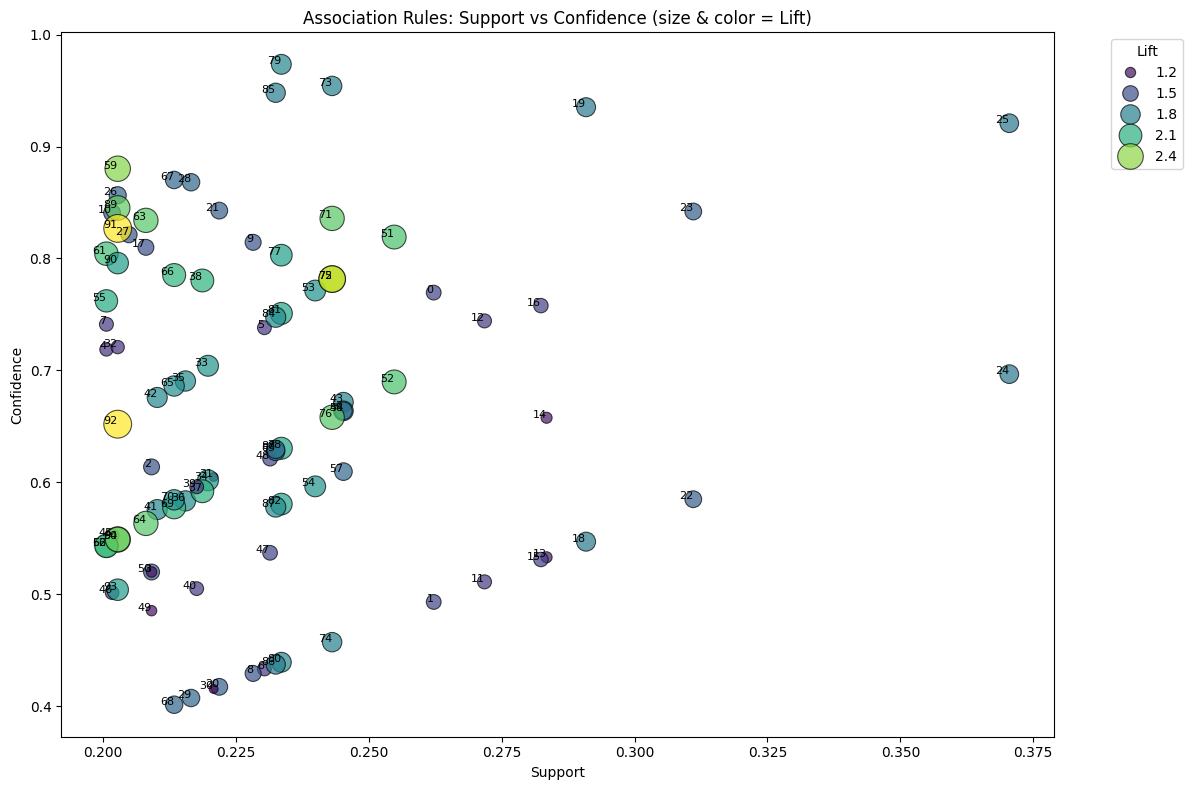

Index 0: frozenset({1}) => frozenset({50})
Index 1: frozenset({50}) => frozenset({1})
Index 2: frozenset({1}) => frozenset({181})
Index 3: frozenset({181}) => frozenset({1})
Index 4: frozenset({7}) => frozenset({50})
Index 5: frozenset({56}) => frozenset({50})
Index 6: frozenset({50}) => frozenset({56})
Index 7: frozenset({64}) => frozenset({50})
Index 8: frozenset({50}) => frozenset({79})
Index 9: frozenset({79}) => frozenset({50})
Index 10: frozenset({96}) => frozenset({50})
Index 11: frozenset({50}) => frozenset({98})
Index 12: frozenset({98}) => frozenset({50})
Index 13: frozenset({50}) => frozenset({100})
Index 14: frozenset({100}) => frozenset({50})
Index 15: frozenset({50}) => frozenset({127})
Index 16: frozenset({127}) => frozenset({50})
Index 17: frozenset({168}) => frozenset({50})
Index 18: frozenset({50}) => frozenset({172})
Index 19: frozenset({172}) => frozenset({50})
Index 20: frozenset({50}) => frozenset({173})
Index 21: frozenset({173}) => frozenset({50})
Index 22: froz

In [32]:
# 2. Trực quan hóa các luật tốt nhất
rules_plot = rules.copy().reset_index()

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=rules_plot, x='support', y='confidence', size='lift', hue='lift',
    palette='viridis', sizes=(40, 400), alpha=0.7, edgecolor='k'
)

# Chú thích từng điểm với chỉ số của nó
for i, row in rules_plot.iterrows():
    plt.text(row['support'], row['confidence'], str(row['index']), fontsize=8, ha='right')

plt.title('Association Rules: Support vs Confidence (size & color = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# In ra bảng ánh xạ giữa chỉ số và quy tắc để tiện tham khảo
for i, row in rules_plot.iterrows():
    print(f"Index {row['index']}: {row['antecedents']} => {row['consequents']}")

In [34]:
# TODO: Xây dựng hệ khuyến nghị dựa trên luật
# def recommend_movies(user_movies, rules, top_n=10):
#     recommendations = []
#     for _, rule in rules.iterrows():
#         antecedents = set(rule['antecedents'])
#         if antecedents.issubset(user_movies):
#             for movie in rule['consequents']:
#                 if movie not in user_movies:
#                     recommendations.append((movie, rule['confidence'], rule['lift']))
#
#     # Sắp xếp theo độ tin cậy và độ nâng
#     recommendations.sort(key=lambda x: (x[1], x[2]), reverse=True)
#     return recommendations[:top_n]

def recommend_movies(user_movies, rules, top_n=10):
    """
    Recommend movies for a user based on their liked movies and association rules.
    Args:
        user_movies (set or list): Movies the user already likes (itemIDs).
        rules (DataFrame): Association rules generated from apriori.
        top_n (int): Number of recommendations to return.
    Returns:
        List of tuples: (movie, confidence, lift)
    """
    recommendations = []
    user_movies_set = set(user_movies)
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        if antecedents.issubset(user_movies_set):
            for movie in rule['consequents']:
                if movie not in user_movies_set:
                    recommendations.append((movie, rule['confidence'], rule['lift']))
    # Loại bỏ trùng lặp, chỉ giữ mỗi phim một lần với confidence/lift cao nhất
    unique_recs = {}
    for movie, conf, lift in recommendations:
        if (movie not in unique_recs) or (conf, lift) > (unique_recs[movie][0], unique_recs[movie][1]):
            unique_recs[movie] = (conf, lift)
    recommendations = [(movie, conf, lift) for movie, (conf, lift) in unique_recs.items()]
    recommendations.sort(key=lambda x: (x[1], x[2]), reverse=True)
    return recommendations[:top_n]

# Ví dụ sử dụng:
user_liked_movies = [1, 50, 100]  # Thay bằng danh sách phim user đã thích
recs = recommend_movies(user_liked_movies, rules, top_n=5)
print("Gợi ý phim:", recs)

Gợi ý phim: [(181, 0.6966067864271457, 1.7314078966078397), (174, 0.5848303393213573, 1.5830752288526397), (172, 0.5469061876247505, 1.758312726083669), (127, 0.5369458128078818, 1.441034061723717), (98, 0.5109780439121756, 1.3992480155967135)]
